In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import wfdb
#from wfdb.io._signal import downround, upround
from wfdb.io.util import downround, upround

## 數據架構

In [2]:
path = "record/"
data = "00001_lr"

In [3]:
ecg_record = wfdb.rdsamp(path+data)
ecg_record[1]

{'fs': 100,
 'sig_len': 1000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

In [4]:
path = "record/"
data = "00002_hr"

In [5]:
ecg_record = wfdb.rdsamp(path+data)
ecg_record[1]

{'fs': 500,
 'sig_len': 5000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

In [6]:
## dict格式
ecg_record[1]['fs']

500

In [7]:
path = "record/"
record = wfdb.rdrecord(path+data)


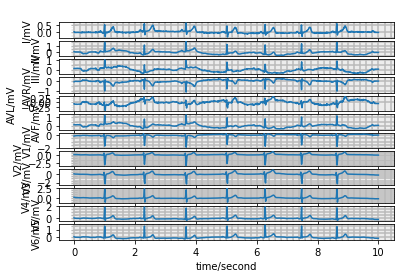

In [8]:
fig = wfdb.plot_wfdb(record, title=" ", time_units="seconds", ecg_grids="all", return_fig=True)

## ECG訊號轉圖片

In [9]:
def calc_ecg_grids(minsig, maxsig, sig_units, fs, maxt, time_units):
    # Get the grid interval of the x axis
    if time_units == 'samples':
        majorx = 0.2 * fs
        minorx = 0.04 * fs
    elif time_units == 'seconds':
        majorx = 0.2
        minorx = 0.04
    elif time_units == 'minutes':
        majorx = 0.2 / 60
        minorx = 0.04/60
    elif time_units == 'hours':
        majorx = 0.2 / 3600
        minorx = 0.04 / 3600

    # Get the grid interval of the y axis
    if sig_units.lower()=='uv':
        majory = 500
        minory = 125
    elif sig_units.lower()=='mv':
        majory = 0.5
        minory = 0.125
    elif sig_units.lower()=='v':
        majory = 0.0005
        minory = 0.000125
    else:
        raise ValueError('Signal units must be uV, mV, or V to plot ECG grids.')

    major_ticks_x = np.arange(0, upround(maxt, majorx) + 0.0001, majorx)
    minor_ticks_x = np.arange(0, upround(maxt, majorx) + 0.0001, minorx)

    major_ticks_y = np.arange(downround(minsig, majory),
                              upround(maxsig, majory) + 0.0001, majory)
    minor_ticks_y = np.arange(downround(minsig, majory),
                              upround(maxsig, majory) + 0.0001, minory)

    return (major_ticks_x, minor_ticks_x, major_ticks_y, minor_ticks_y)


In [10]:
path = "record/"
data = "00001_lr"

ecg_record = wfdb.rdsamp(path+data)
record = wfdb.rdrecord(path+data)


In [11]:
fig = wfdb.plot_wfdb(record, title=" ", time_units="seconds", ecg_grids="all", return_fig=True)
childs = fig.get_children()[1:]
sampling_rate = ecg_record[1]['fs']
units = ecg_record[1]['units']
for child, u in zip(childs, units):

    # Normalize y limits, remove ticks
    axes = child.axes
    axes.set_ylim([-1, 1])
    axes.tick_params(bottom=False, top=False, right=False, left=False)

    # Modified ECG grid code from WFDB-Python: https://github.com/MIT-LCP/wfdb-python
    auto_xlims = axes.get_xlim()
    auto_ylims= axes.get_ylim()

    (major_ticks_x, minor_ticks_x, major_ticks_y,
        minor_ticks_y) = calc_ecg_grids(auto_ylims[0], auto_ylims[1],
                                        u, sampling_rate, auto_xlims[1],
                                        "samples")

    min_x, max_x = np.min(minor_ticks_x), np.max(minor_ticks_x)
    min_y, max_y = np.min(minor_ticks_y), np.max(minor_ticks_y)

    for tick in minor_ticks_x:
        axes.plot([tick, tick], [min_y,  max_y], c='#ededed',
                        marker='|', zorder=1)
    for tick in major_ticks_x:
        axes.plot([tick, tick], [min_y, max_y], c='#bababa',
                        marker='|', zorder=2)
    for tick in minor_ticks_y:
        axes.plot([min_x, max_x], [tick, tick], c='#ededed',
                        marker='_', zorder=1)
    for tick in major_ticks_y:
        axes.plot([min_x, max_x], [tick, tick], c='#bababa',
                        marker='_', zorder=2)

    # Plotting the lines changes the graph. Set the limits back
    axes.set_xlim(auto_xlims)
    axes.set_ylim(auto_ylims)

    # Remove axes
    axes.set_axis_off()

fig.savefig("test.png")
plt.close(fig)